In [1]:
#importing the important libararies
import pandas as pd
import numpy as np


In [2]:
#loading dataset
try:
    
    dataset=pd.read_csv("spam.csv",encoding='iso-8859-1')
except FileNotFoundError:
    print("File Not found error")
except UnicodeDecodeError as e:
    print(f'Error decoding :{e}')

In [3]:
# the following are the step involement to build model
# 1.data cleaning
# 2.EDA
# 3.Text preprocessing
# 4.model building
# 5.evaluation
# 6.improvement 

# 1.data cleaning

In [4]:
#checking the shape of dataset
dataset.shape

(5572, 5)

In [5]:
#getting the first 5 record
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#getting last 5 record
dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
#getting the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#describing the dataset
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
#drop last 3 columns because it contain very less data and uncessary data
dataset=dataset.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"]) 


In [10]:
#renaming the columns
dataset.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [11]:
#encoding the text using the labelEncoder as to convert categorical variables into numerical form
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
# fit the transformation parameters on the training data and transform the input data using the learned parameters. 
# It takes the input data as an argument, fits the transformation parameters on the input data, and returns the transformed data.
dataset["target"]=encoder.fit_transform(dataset['target'])

In [13]:


#checking missing value as  getting information as any missing value is avilable in dataset
dataset.isnull()

,target,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [14]:
#checking missing value as  getting information about number of  missing value is avilable in dataset
dataset.isnull().sum()
#no any missing  value is available in dataset

target    0
text      0
dtype: int64

In [15]:
#check for duplicate value is available or not in dataset
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [16]:
#check for  number of duplicate value is available in dataset
dataset.duplicated().sum()

403

In [17]:
#remove duplicate value as it is very less than numnber of record available
dataset=dataset.drop_duplicates(keep="first")

In [18]:
#again checking also any duplicate value is available
dataset.duplicated().sum()
#it means no any features have  the duplicated value

0

In [19]:
# checking the shape of dataset after cleanig data
dataset.shape

(5169, 2)

# 2.EDA  (Exploratory data analysis)

In [20]:
#getting the numnber of value availabe in target features
dataset["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [21]:
#importing the visualization libraries
import matplotlib.pyplot as plt

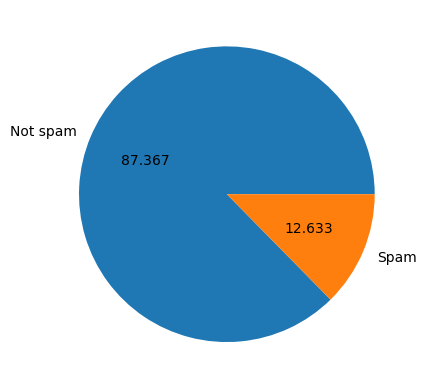

In [22]:
#oly  two value is availab in target features .As nomianal data is available .so piechart is used to visualize data
plt.pie(dataset["target"].value_counts(),labels=["Not spam","Spam"],autopct="%.3f") 
plt.show() #to remove the extra piece of code


<Axes: xlabel='target', ylabel='Count'>

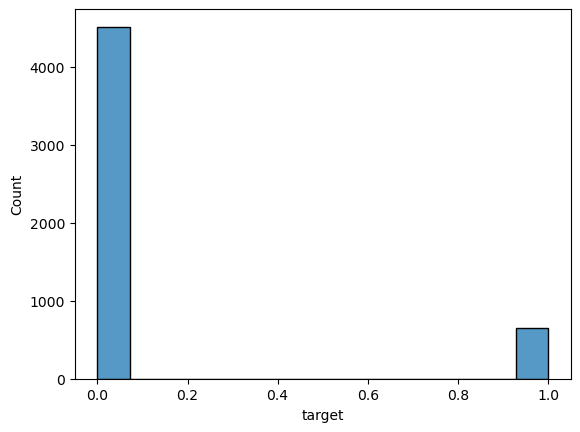

In [23]:
import seaborn as sns
sns.histplot(dataset["target"])

In [24]:
# checking data is imbalance or not
dataset["target"].value_counts()


0    4516
1     653
Name: target, dtype: int64

In [25]:
# # from imblearn.over_sampling import RandomOverSampler
# import imblearn
# from imblearn.combine import SMOTETomek


In [26]:

# # Implementing Oversampling for Handling Imbalanced 
# smk = SMOTETomek(random_state=42)
# X,y=smk.fit_sample(X,y)

In [27]:
# os=RandomOverSampler()

In [28]:
#ADD NEWCOLUMNS NAMED BE num_character
dataset['num_character']=dataset["text"].apply(len)

In [29]:
dataset.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# !pip install nltk

In [31]:
#for depper anlaysis based on the text
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
#breaking down the sentences into smaller token
dataset["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [33]:
#getting the num of word
dataset["num_of_words"]=dataset["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [34]:
dataset.head()

,target,text,num_character,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [35]:
#getting the num of sen availabke in sms
dataset["num_sen"]=dataset["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [36]:
dataset.head()

,target,text,num_character,num_of_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
#describin the new datasegt with num_word,num_sen and num_character
dataset[["num_character","num_of_words","num_sen"]].describe()

,num_character,num_of_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [38]:
#importing the seaborn librabry for the better visulalization
import seaborn as sns


In [39]:
#analysiis of both ham and spam message differnetly 
#for ham
dataset[dataset["target"]==0][["num_character","num_of_words","num_sen"]]

,num_character,num_of_words,num_sen
0,111,24,2
1,29,8,2
3,49,13,1
4,61,15,1
6,77,18,2
...,...,...,...
5565,12,4,1
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [40]:
#for spam
dataset[dataset["target"]==1][["num_character","num_of_words","num_sen"]]

,num_character,num_of_words,num_sen
2,155,37,2
5,148,39,4
8,158,32,5
9,154,31,3
11,136,31,3
...,...,...,...
5537,90,18,3
5540,160,38,6
5547,160,35,5
5566,147,30,1


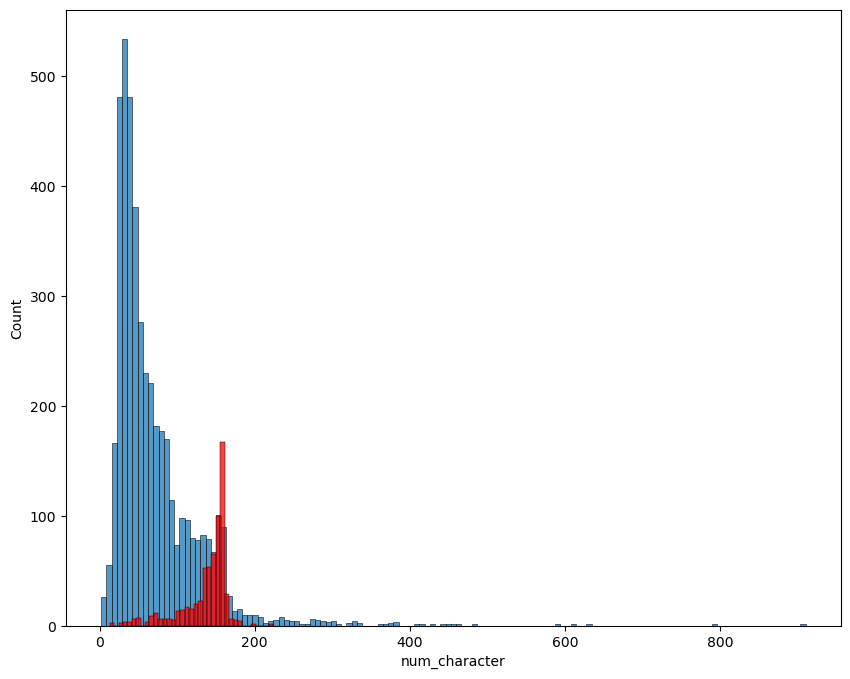

In [41]:
#visulaization
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_character"])
sns.histplot(dataset[dataset["target"]==1]["num_character"],color='red')
plt.show()

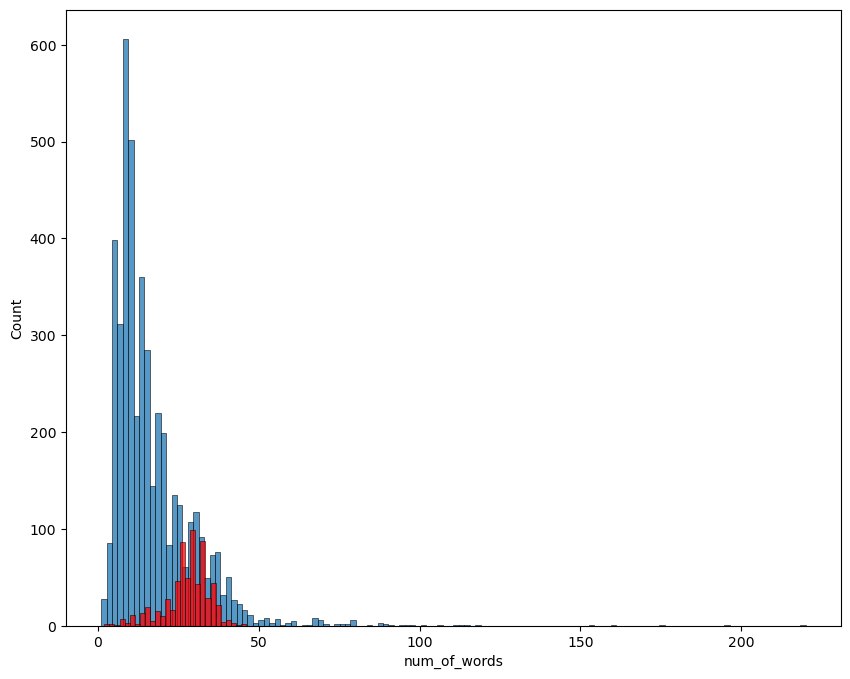

In [42]:
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_of_words"])
sns.histplot(dataset[dataset["target"]==1]["num_of_words"],color='red')
plt.show()

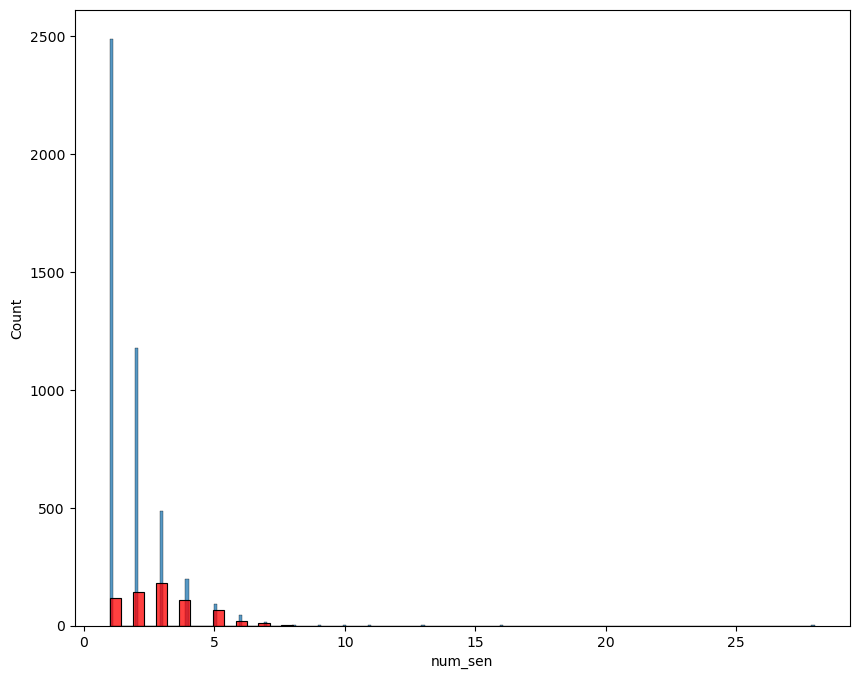

In [43]:
plt.figure(figsize=(10,8))
sns.histplot(dataset[dataset["target"]==0]["num_sen"])
sns.histplot(dataset[dataset["target"]==1]["num_sen"],color='red')
plt.show()

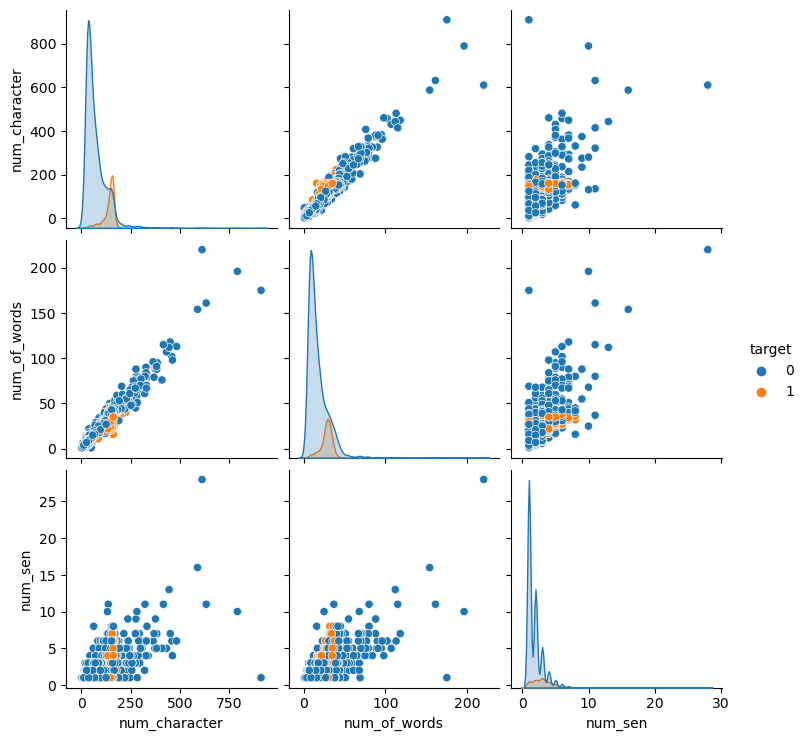

In [44]:
#getting the pairplot of the data
sns.pairplot(dataset,hue='target')

In [45]:
#getting the correlation coeffieceint
dataset.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_7240\616400433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,target,num_character,num_of_words,num_sen
target,1.000000,0.384717,0.262984,0.284901
num_character,0.384717,1.000000,0.965770,0.638143
num_of_words,0.262984,0.965770,1.000000,0.684541
num_sen,0.284901,0.638143,0.684541,1.000000


C:\Users\Acer\AppData\Local\Temp\ipykernel_7240\1623609731.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

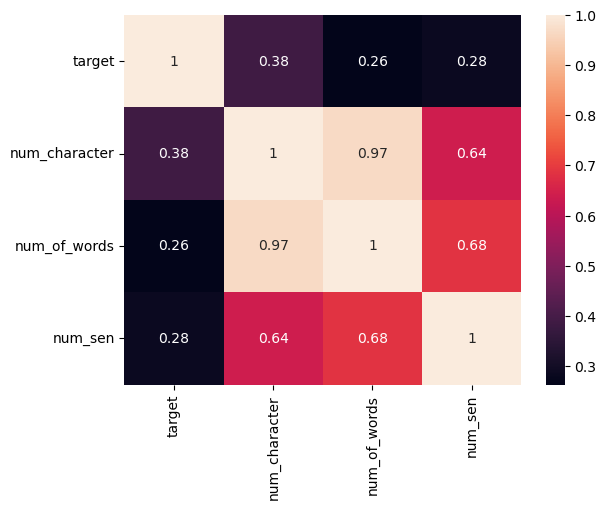

In [46]:
#getting the data in heatmap
sns.heatmap(dataset.corr(),annot=True)

In [47]:
#about the stemming word
from nltk.corpus import stopwords
stopwords.words('english')

#about the punctuation
import string
string.punctuation

#about stemming of the word
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [48]:
def text_transform(text):
    text_lower=text.lower() #changing all chaarcter into lower
#     print(f'text_in_lower={text_lower}')
    
    text_break_word=nltk.word_tokenize(text_lower)#breaking all the sentence into word and store in list 
#     print(f'text_break_word={text_break_word}')
    
    #TEXT WITHOUT SPECIAL  CHARACTER
    text_without_spec_char=[]
    for i in text_break_word:
        if  i.isalnum():
            text_without_spec_char.append(i) #REMOVING THE SPECIAL CHARACTER
#     print(f'text_without_spec_char={text_without_spec_char}') 
    
    
    #REMOVING  THE stopword and punctuation
    text_without_stopword_punc=[]
    for i in text_without_spec_char:
        if i not in stopwords.words("english") and i not in string.punctuation:
            text_without_stopword_punc.append(i)
#     print(f'text_without_stopword_punc={text_without_stopword_punc}')
        
        
    #removig stemming 
    text_without_stemming=[]
    for i in text_without_stopword_punc:
        text_without_stemming.append(ps.stem(i))
        
#     print(f'text_without_stemming={text_without_stemming}') 
            
    return " ".join(text_without_stemming)

    

In [49]:
text_transform(dataset["text"][10])


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [50]:
dataset.head()

,target,text,num_character,num_of_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [51]:
#getting the transform column
dataset["text"].apply(text_transform)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [52]:
dataset["transformed_text"]=dataset["text"].apply(text_transform)

In [53]:
dataset.head()

,target,text,num_character,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

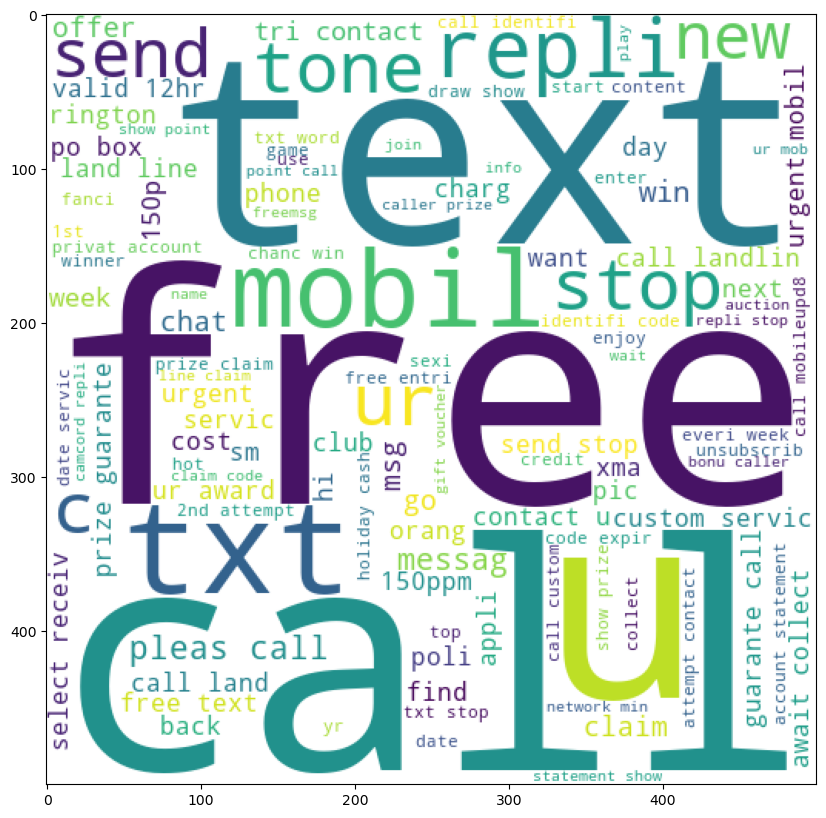

In [55]:
#word clod for the spam sms

spam_wc=wc.generate(dataset[dataset["target"]==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)
plt.show()

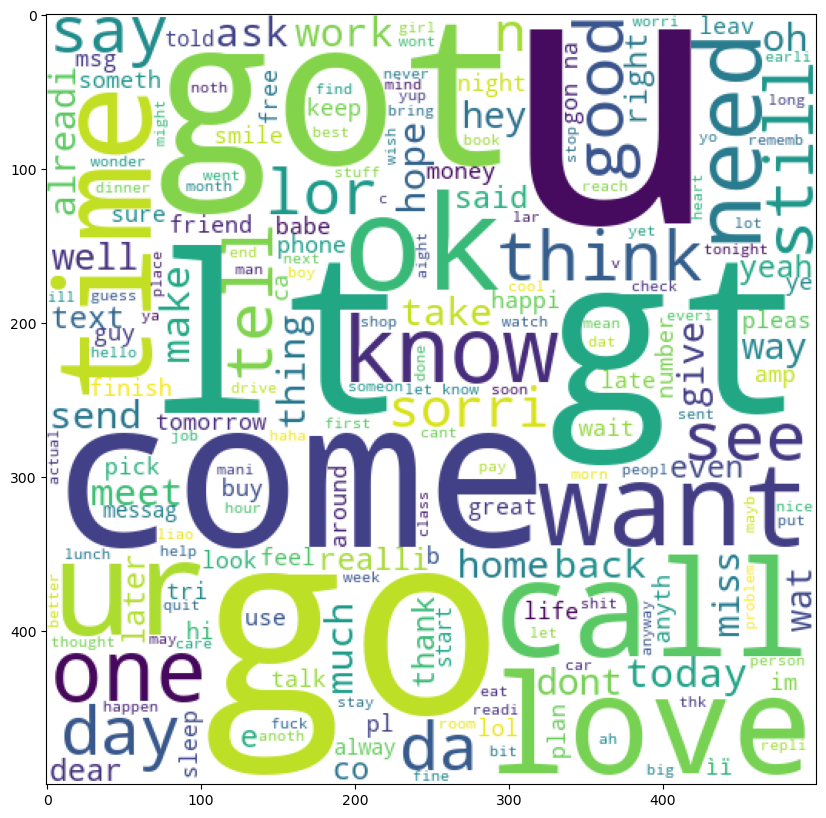

In [56]:
#word clod for the ham sms

ham_wc=wc.generate(dataset[dataset["target"]==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)
plt.show()

In [57]:
#top 30 word in spam
dataset.head()
all_text_in_spam=dataset[dataset['target']==1]["transformed_text"].tolist()

spam_sms=[]
for msg in all_text_in_spam:
    for word in  msg.split():
        
        spam_sms.append(word)


In [58]:
len(spam_sms)

9939

In [59]:
from collections import Counter
count_spam_df=pd.DataFrame(Counter(spam_sms).most_common(30))

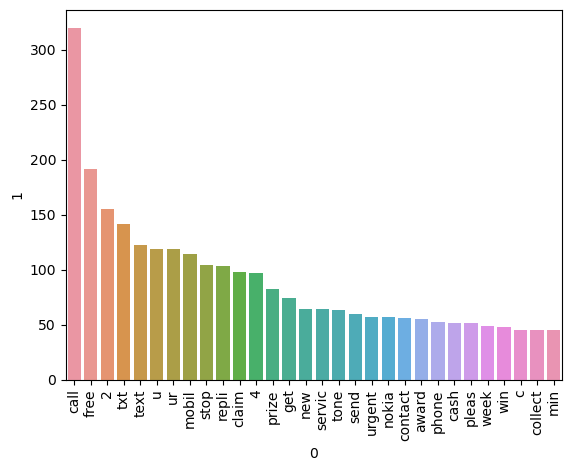

In [60]:
#plot of the number os most occuring word
sns.barplot(x=count_spam_df[0],y=count_spam_df[1])
plt.xticks(rotation="vertical")
plt.show()

In [61]:
#top 30 for ham
all_text_ham=dataset[dataset["target"]==0]["transformed_text"].tolist()
all_text_ham

ham_sms=[]
for sms in all_text_ham:
    for word in sms.split():
        ham_sms.append(word)
            
            

In [62]:
#length of ham message

len(ham_sms)

35394

In [63]:
from collections import Counter
count_ham_df=pd.DataFrame(Counter(ham_sms).most_common(30))

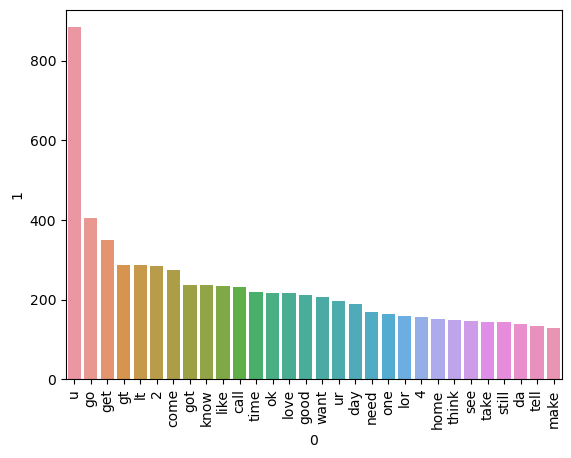

In [64]:
sns.barplot(x=count_ham_df[0],y=count_ham_df[1])
plt.xticks(rotation="vertical")
plt.show()

# 4.model Building


In [65]:
dataset.head()

,target,text,num_character,num_of_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfd=TfidfVectorizer(max_features=3000)

In [67]:
#using CountVectorizer
# X=cv.fit_transform(dataset["transformed_text"]).toarray()
# print(X.shape)
# y=dataset["target"].values
# print(y)

#using TfidfVectorizer
X=tfd.fit_transform(dataset["transformed_text"]).toarray()
print(X.shape)
y=dataset["target"].values
print(y)


#

(5169, 3000)
[0 0 1 ... 0 0 0]


In [68]:
#train test split
from sklearn.model_selection import train_test_split


In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=2)

In [70]:
#model training
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [71]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [72]:
#accuracy

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred1)}')
print(f'confusion_matrix={confusion_matrix(y_test,y_pred1)}')
print(f'precision_score={precision_score(y_test,y_pred1)}')

accuracy_score=0.8694390715667312
confusion_matrix=[[788 108]
 [ 27 111]]
precision_score=0.5068493150684932


In [73]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred2)}')
print(f'confusion_matrix={confusion_matrix(y_test,y_pred2)}')
print(f'precision_score={precision_score(y_test,y_pred2)}')

accuracy_score=0.9709864603481625
confusion_matrix=[[896   0]
 [ 30 108]]
precision_score=1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred3)}')
print(f'confusion_matrix={confusion_matrix(y_test,y_pred3)}')
print(f'precision_score={precision_score(y_test,y_pred3)}')

accuracy_score=0.9835589941972921
confusion_matrix=[[895   1]
 [ 16 122]]
precision_score=0.991869918699187


In [75]:
#for this dataset conrtainig text .so  we choose tfd and mnb of naive bayes algorithm to train ,model

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
   #checking the svc algorithm
    
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
accuracy_svc=accuracy_score(y_test,y_pred_svc)
precision_svc=precision_score(y_test, y_pred_svc)
print("For ",svc)
print("Accuracy - ",accuracy_svc)
print("Precision - ",precision_svc)

For  SVC(gamma=1.0, kernel='sigmoid')
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


In [79]:
# #with    KNN  algorithm 

# knc.fit(X_train,y_train)
# y_pred_knc=knc.predict(X_test)
# accuracy_knc=accuracy_score(y_test,y_pred_knc)
# precision_knc=precision_score(y_test, y_pred_knc)
# print("For ",knc)
# print("Accuracy - ",accuracy_knc)
# print("Precision - ",precision_knc)

In [80]:
# #decision tree
# dtc.fit(X_train,y_train)
# y_pred_dtc=dtc.predict(X_test)
# accuracy_dtc=accuracy_score(y_test,y_pred_dtc)
# precision_dtc=precision_score(y_test, y_pred_dtc)
# print("For ",dtc)
# print("Accuracy - ",accuracy_dtc)
# print("Precision - ",precision_dtc)

In [81]:
# #logistics regression
# lrc.fit(X_train,y_train)
# y_pred_lrc=lrc.predict(X_test)
# accuracy_lrc=accuracy_score(y_test,y_pred_lrc)
# precision_lrc=precision_score(y_test, y_pred_lrc)
# print("For ",lrc)
# print("Accuracy - ",accuracy_lrc)
# print("Precision - ",precision_lrc)

In [82]:
# #Random forest classifier
# rfc.fit(X_train,y_train)
# y_pred_rfc=lrc.predict(X_test)
# accuracy_rfc=accuracy_score(y_test,y_pred_rfc)
# precision_rfc=precision_score(y_test, y_pred_rfc)
# print("For ",rfc)
# print("Accuracy - ",accuracy_rfc)
# print("Precision - ",precision_rfc)

In [83]:

# #adaboost classifier
# abc.fit(X_train,y_train)
# y_pred_abc=abc.predict(X_test)
# accuracy_abc=accuracy_score(y_test,y_pred_abc)
# precision_abc=precision_score(y_test, y_pred_abc)
# print("For ",abc)
# print("Accuracy - ",accuracy_abc)
# print("Precision - ",precision_abc)

In [84]:
# #bagging classifier
# bc.fit(X_train,y_train)
# y_pred_bc=bc.predict(X_test)
# accuracy_bc=accuracy_score(y_test,y_pred_bc)
# precision_bc=precision_score(y_test, y_pred_bc)
# print("For ",bc)
# print("Accuracy - ",accuracy_bc)
# print("Precision - ",precision_bc)

In [85]:
# #xgboost algorithm
# xgb.fit(X_train,y_train)
# y_pred_xgb=xgb.predict(X_test)
# accuracy_xgb=accuracy_score(y_test,y_pred_xgb)
# precision_xgb=precision_score(y_test, y_pred_xgb)
# print("For ",xgb)
# print("Accuracy - ",accuracy_xgb)
# print("Precision - ",precision_xgb)


In [86]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }


In [87]:
# def train_classifier(clf,X_train,y_train,X_test,y_test):
#     clf.fit(X_train,y_train)
#     y_pred=clf.predict(X_test)
#     accuracy=accuracy_score(y_test,y_pred)
#     precision=precision_score(y_test, y_pred)
    
#     return accuracy,precision
    
    

In [88]:
# model improvement
# change the max_features of paramter of tfidf
# the most perform algorithm for this problem be
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(f'accuracy_score={accuracy_score(y_test,y_pred2)}')
print(f'precision_score={precision_score(y_test,y_pred2)}')

accuracy_score=0.9709864603481625
precision_score=1.0


In [89]:
#creating the pipeline
import pickle
pickle.dump(tfd,open("Vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))
pickle.dump(text_transform,open("text_transform_function.pkl","wb"))

In [ ]:
End